In [1]:
import sys
sys.path.append("./../")

# # Run the following line to install the required libraries
# %pip install --user -r ./../requirements.txt

In [2]:
import matplotlib.pyplot as plt
import ipywidgets
from src.interface.characterization import CharacterizationInterface

## Example of characterization code
In this example, we load the options of the interferometer response characterization algorithm (IRCA) for the characterization, given a set of monochromator acquisition. We first load the center spot of each interferometer, a flat field and the neighborhood mean, then process those to fit the curve to our model.

In [3]:
acquisition_folder = "../data/acquisitions/imspoc_uv_2"
options_file = "../data/characterization/imspoc_uv_2_characterization_options.json"
device_file = "../data/device/imspoc_uv_2.json"

# Loads all the information for the characterization
characterization_protocol = CharacterizationInterface.from_file(
    acquisition_folder=acquisition_folder, method_json=options_file, device_json=device_file,
)

# Characterizes the device
characterization = characterization_protocol.characterization()

## Visualization of the monochromator acquisition
We visualize here the monochromator acquisitions at the center spot of each interferometer, together with the flat field; the green curve shows how normalizing by the flat approximates a sinusoidal function.

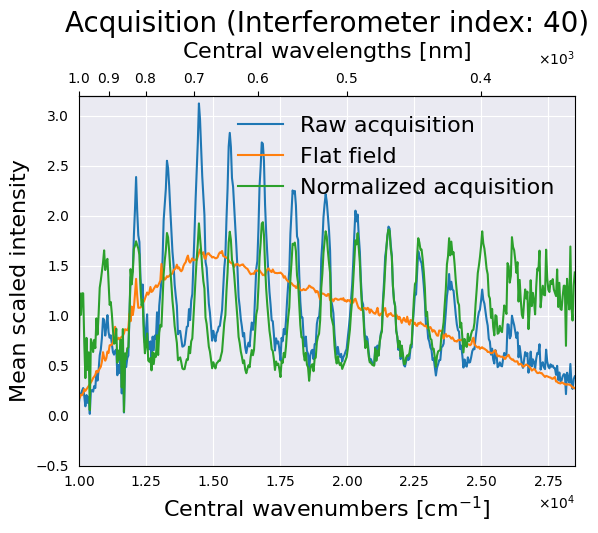

In [4]:
def visualize_acquisition(protocol, interferometer=40):
    _, ax = protocol.acquisition.visualize(interferometer=interferometer)
    ax.set_ylim([-0.5, 3.2])

# Fixed visualiztion
visualize_acquisition(protocol=characterization_protocol)

# # Slider visualization
# ipywidgets.interact(
#     visualize_acquisition, 
#     protocol=ipywidgets.fixed(characterization_protocol), 
#     interferometer=(0, 318),
# );

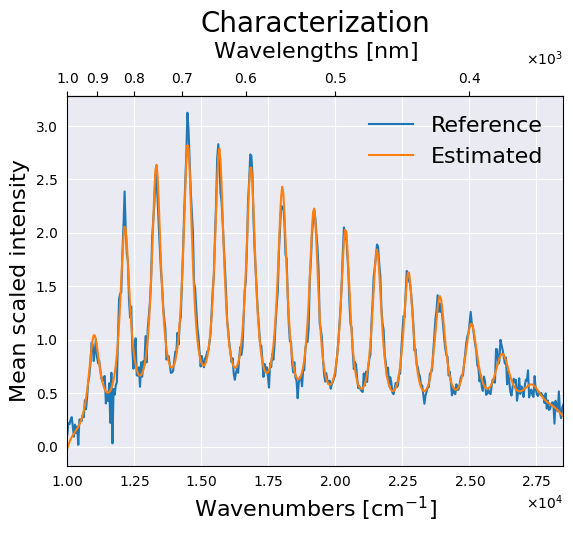

In [5]:
def visualize_characterization(characterization, acquisition, interferometer=40):
    characterization.visualize_compare(
        transfer=acquisition.data, 
        wavenumbers=acquisition.central_wavenumbers, 
        interferometer=interferometer,
    )
    plt.show()

# Fixed visualization
visualize_characterization(characterization=characterization, acquisition=characterization_protocol.acquisition)
    
# # Slider visualization
# ipywidgets.interact(
#     visualize_characterization,
#     characterization=ipywidgets.fixed(characterization),
#     acquisition=ipywidgets.fixed(characterization_protocol.acquisition), 
#     interferometer=(0, 318)
# );

## OPD and reflectivity
Finally, we visualize the OPD estimated for each interferometer. Additionally, the estimated reflectivity is shown within a standard deviation range across all interferometers.

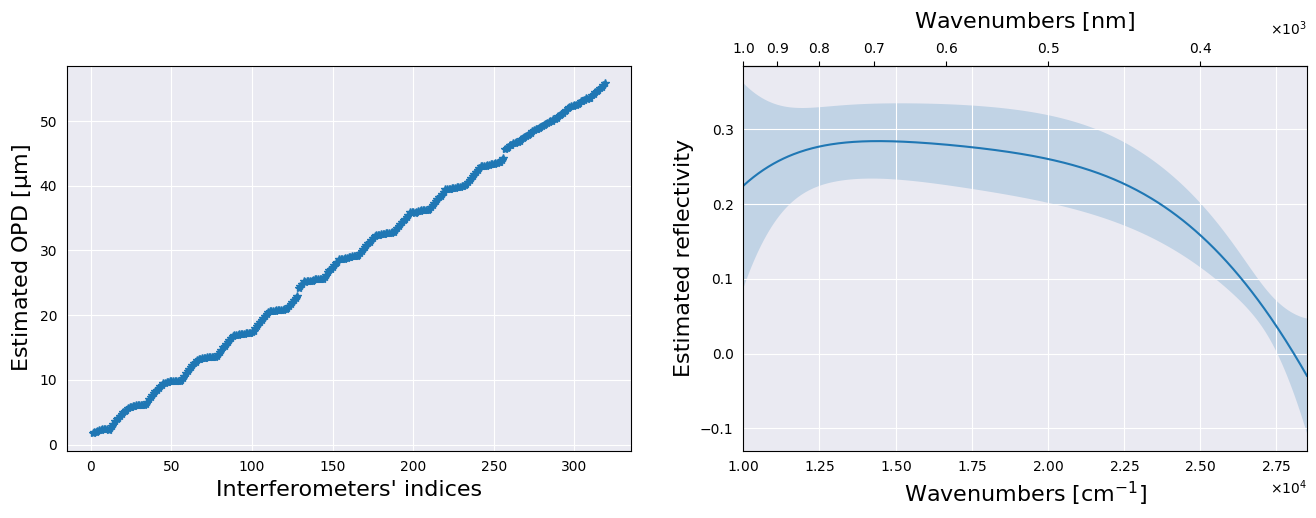

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
characterization.visualize_opd(figure=(fig, ax[0]))
characterization.visualize_reflectivity(wavenumber=characterization_protocol.acquisition.central_wavenumbers, figure=(fig, ax[1]))
plt.show()